# Covid_19_Datasets Analysis


This data set is a 2019 Novel Coronavirus of UnitedStates. This is also a pandemic situation in the whole world which is affecting in all the regions. 

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. 

Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.The dataset  is provided to identify the deaths and recovered cases.


Field description

Province_State - The name of the State within the USA.

Country_Region - The name of the Country (US).

Last_Update - The most recent date the file was pushed.

Lat - Latitude.

Long_ - Longitude.

Confirmed - Aggregated confirmed case count for the state.

Deaths - Aggregated Death case count for the state.

Recovered - Aggregated Recovered case count for the state.

Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).

FIPS - Federal Information Processing Standards code that uniquely identifies countries within the USA.

Incident_Rate - confirmed cases per 100,000 persons.

People_Tested - Total number of people who have been tested.

People_Hospitalized - Total number of people hospitalized.

Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.

UID - Unique Identifier for each row entry.

ISO3 - Officialy assigned country code identifiers.

Testing_Rate - Total number of people tested per 100,000 persons.

Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.


Importing or calling all necessary models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Dataset

Loading / Cleaning / Formatting

In [2]:
df=pd.read_csv('Covid_19.csv')
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [3]:
#Shape of the above dataset:
df.shape

(58, 18)

In [4]:
#head shows first five rows of the data:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [5]:
#tail shows last five rows of the data:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [6]:
#Information required of the datasets:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [7]:
#types of the data:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

# Removing of Unnecessary DataSets:

I am going to remove some to the columns which need to be removed in order to make the model more effective.

Country_Region- The name of the Country (US).

Last_Update- The most recent date the file was pushed.

Lat- Latitude

Long_- Longitude

UID- Unique Identifier for each row entry.


FIPS- Federal Information Processing Standards code that uniquely identifies counties within the USA.

In [8]:
df.drop("Country_Region", axis=1,inplace=True)

In [9]:
df.drop("Last_Update", axis=1,inplace=True)

In [10]:
df.drop("Lat", axis=1,inplace=True)

In [11]:
df.drop("Long_", axis=1,inplace=True)

In [12]:
df.drop("UID", axis=1,inplace=True)

In [13]:
df.drop("FIPS", axis=1,inplace=True)

In [14]:
df.head(10)

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,NaN,12530.0,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,401,10,352.0,39.0,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,American Samoa,0,0,NaN,0.0,0.000000,124.0,NaN,NaN,ASM,222.857246,NaN
3,Arizona,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584
5,California,85997,3497,NaN,82500.0,217.646575,1380120.0,NaN,4.066421,USA,3492.893832,NaN
6,Colorado,22797,1299,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,USA,2289.339188,17.348774
7,Connecticut,39017,3529,6264.0,29224.0,1094.357902,190718.0,10946.0,9.044775,USA,5349.302875,28.054438
8,Delaware,8194,310,3965.0,3919.0,841.476990,45412.0,NaN,3.783256,USA,4663.552976,NaN
9,Diamond Princess,49,0,NaN,49.0,NaN,NaN,NaN,0.000000,USA,NaN,NaN


In [15]:
df.shape

(58, 12)

# Removing Missing Values

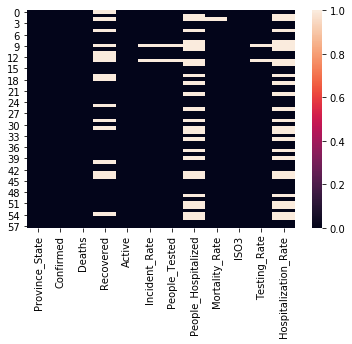

In [16]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the black color shows the '0' value here, it means that none of the value is emmpty(Null Values).

Where as we can see some of the white lines in the heat map that shows the presence of nan values in the given data set.

We will be treating these values.

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 '

In [17]:
df.isnull().sum()

Province_State           0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

These are the number of NAN values present in our current dataset.

In [18]:
df["Recovered"] = df["Recovered"].fillna(df["Recovered"].dropna().mode().values[0] )

In [19]:
df.head(10)

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,13.0,12530.0,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,401,10,352.0,39.0,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,American Samoa,0,0,13.0,0.0,0.000000,124.0,NaN,NaN,ASM,222.857246,NaN
3,Arizona,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584
5,California,85997,3497,13.0,82500.0,217.646575,1380120.0,NaN,4.066421,USA,3492.893832,NaN
6,Colorado,22797,1299,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,USA,2289.339188,17.348774
7,Connecticut,39017,3529,6264.0,29224.0,1094.357902,190718.0,10946.0,9.044775,USA,5349.302875,28.054438
8,Delaware,8194,310,3965.0,3919.0,841.476990,45412.0,NaN,3.783256,USA,4663.552976,NaN
9,Diamond Princess,49,0,13.0,49.0,NaN,NaN,NaN,0.000000,USA,NaN,NaN


In [20]:
df["Hospitalization_Rate"] = df["Hospitalization_Rate"].fillna(df["Hospitalization_Rate"].dropna().median() )

In [21]:
df["Incident_Rate"] = df["Incident_Rate"].fillna(df["Incident_Rate"].dropna().mode().values[0] )

In [22]:
df["People_Tested"] = df["People_Tested"].fillna(df["People_Tested"].dropna().mode().values[0] )

In [23]:
df["People_Hospitalized"] = df["People_Hospitalized"].fillna(df["People_Hospitalized"].dropna().median() )

In [24]:
df["Mortality_Rate"] = df["Mortality_Rate"].fillna(df["Mortality_Rate"].dropna().mode().values[0] )

In [25]:
df["Testing_Rate"] = df["Testing_Rate"].fillna(df["Testing_Rate"].dropna().mode().values[0] )

In [26]:
df

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,13.0,12530.0,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,401,10,352.0,39.0,54.815493,37045.0,1493.0,2.493766,USA,5063.940017,13.598326
2,American Samoa,0,0,13.0,0.0,0.000000,124.0,1493.0,0.000000,ASM,222.857246,13.598326
3,Arizona,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584
5,California,85997,3497,13.0,82500.0,217.646575,1380120.0,1493.0,4.066421,USA,3492.893832,13.598326
6,Colorado,22797,1299,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,USA,2289.339188,17.348774
7,Connecticut,39017,3529,6264.0,29224.0,1094.357902,190718.0,10946.0,9.044775,USA,5349.302875,28.054438
8,Delaware,8194,310,3965.0,3919.0,841.476990,45412.0,1493.0,3.783256,USA,4663.552976,13.598326
9,Diamond Princess,49,0,13.0,49.0,0.000000,124.0,1493.0,0.000000,USA,97.702058,13.598326


In [27]:
df.isnull().sum()

Province_State          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

Now we Do not have any missing values in our data:

In [28]:
df.describe()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,26756.086207,1611.017241,5077.931034,20070.724138,382.567674,2.180696e+05,3430.017241,4.381382,3763.273600,14.021759
std,52562.031122,4084.750891,10391.345235,41294.705318,402.221849,2.964209e+05,10024.887841,2.195667,2023.439262,3.800090
min,0.000000,0.000000,13.000000,0.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058,6.778043
25%,2596.000000,74.000000,13.000000,812.500000,139.910412,4.166725e+04,1454.500000,2.952622,2649.226598,12.829963
50%,10148.500000,385.000000,1079.500000,5644.500000,244.809981,1.334500e+05,1493.000000,4.382399,3440.890063,13.598326
75%,29395.500000,1394.250000,4383.750000,19291.250000,462.828082,2.620348e+05,1722.750000,5.450908,4622.586404,15.552021
max,354370.000000,28636.000000,61886.000000,263848.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,28.054438


From the above table we could see that the average no. of confirmed cases of corona virus in every city is around 26756 patients where the average death took place is 1611 and average recovery is 5077 which is very less. As we can se the revery rate is low so it has more active patients of corona virus.
Also we could see the maximum and minimum , mean media and mode number of corona patients in us countries.

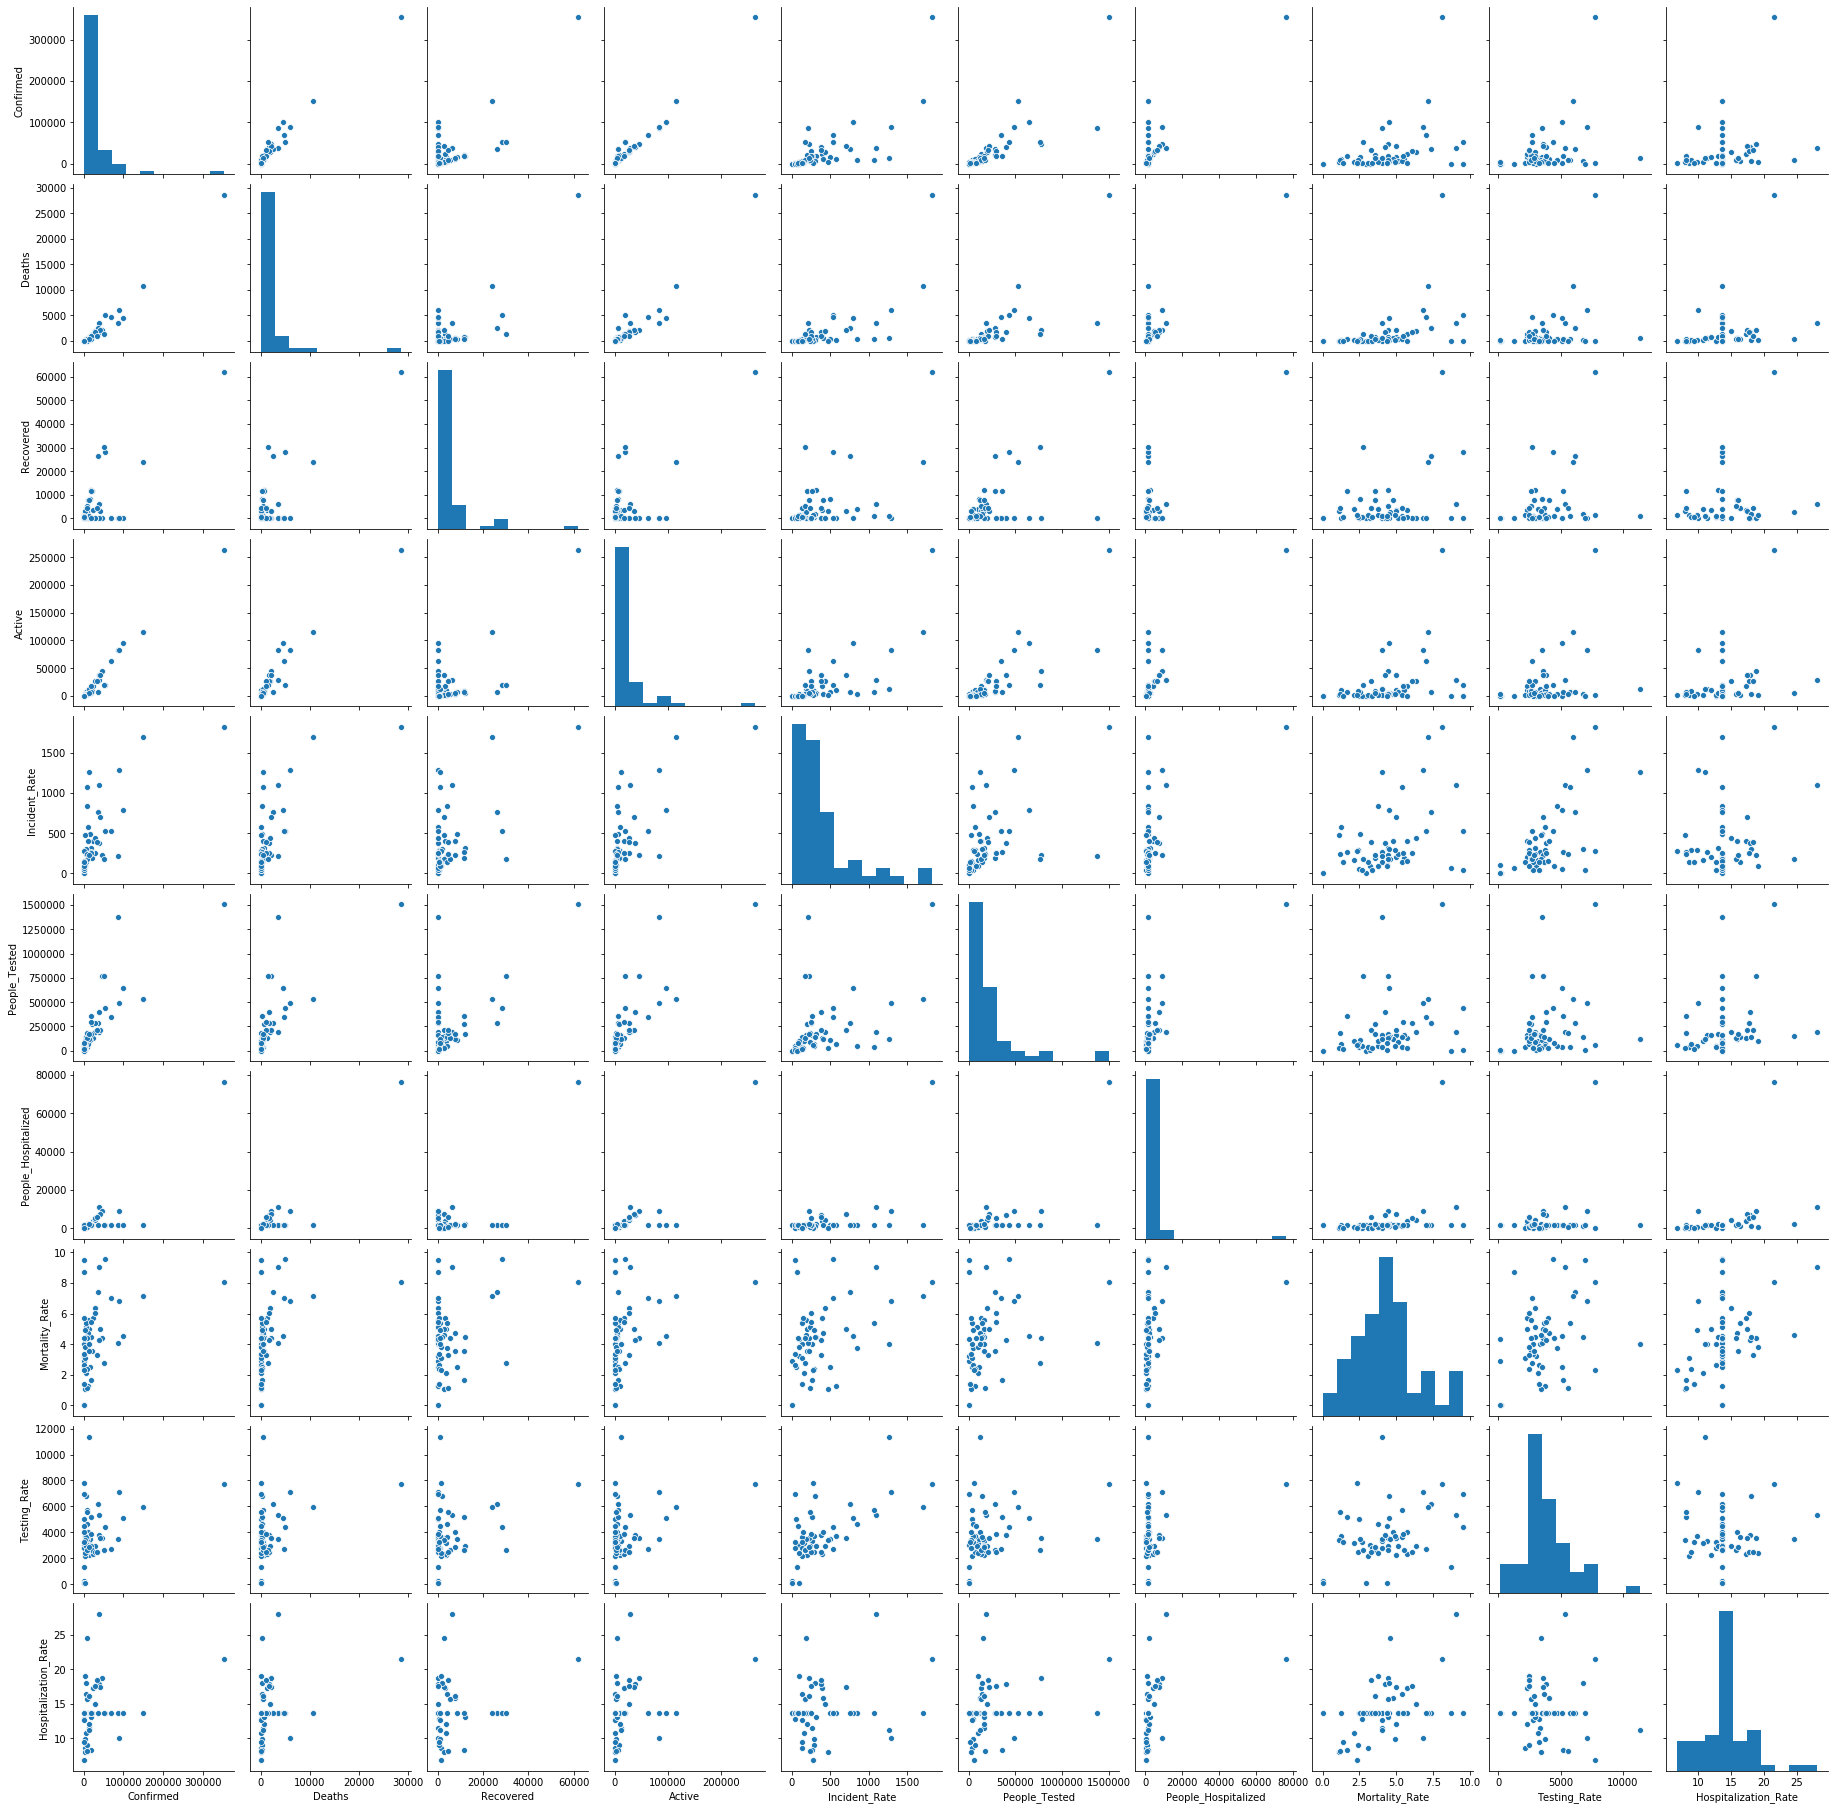

In [29]:
sns.pairplot(df)

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "\" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other. 

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.
These fields are :
Confirmed', 'Deaths','Recovered', 'Active', 'Incident_Rate', 'People_Tested','People_Hospitalized','Mortality_Rate','Hospitalization_Rate'
 
These fields are some what showing neutral correlation with each other. The below graph shows is the stucture of corelation between each of the variables with respect to the heatmap.The black dots represent negative corelation where as off white color shows the positive corelation. There are field which are negative relationship, hence we will not be removing "'Testing_Rate'" Because it is showing the relationship with other fields it is only negative with Hospialization_rate.

We have already removed other fields from the data whic are not. in use to predict the deaths.

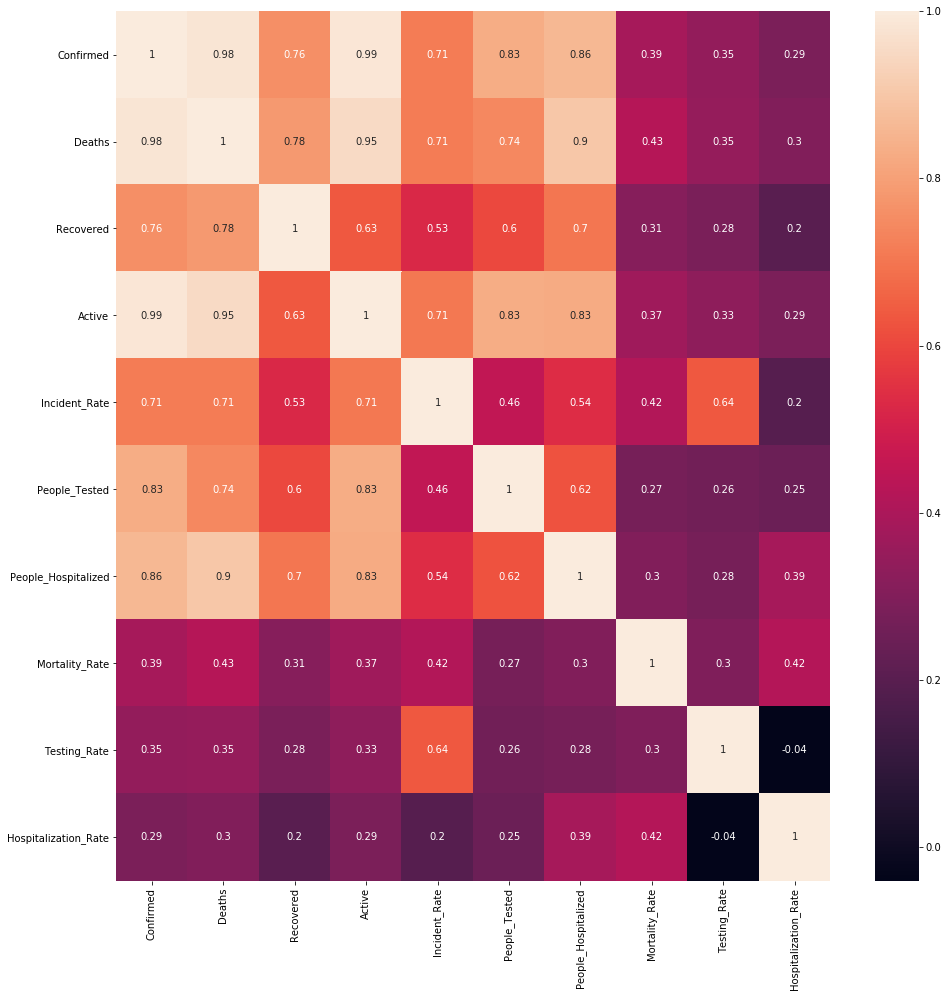

In [30]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [31]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Confirmed', 'Deaths'], dtype='object'),
 dtype('float64'): Index(['Recovered', 'Active', 'Incident_Rate', 'People_Tested',
        'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate',
        'Hospitalization_Rate'],
       dtype='object'),
 dtype('O'): Index(['Province_State', 'ISO3'], dtype='object')}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4e9522b50>,
      dtype=object)

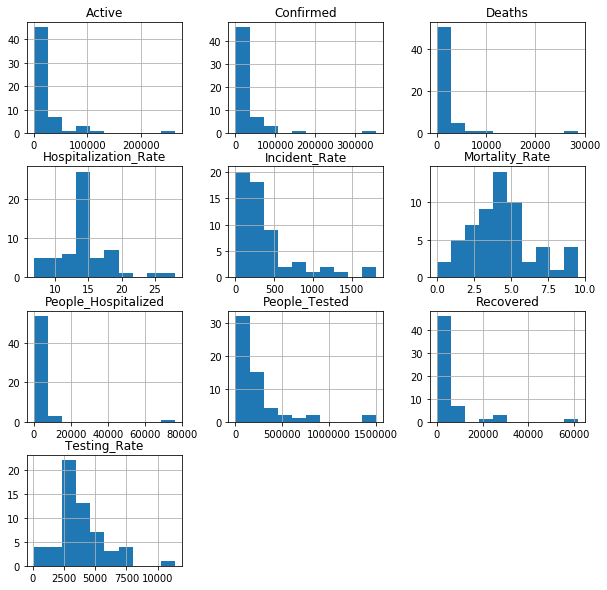

In [32]:
df.hist(figsize=(10,10))

The above Histogram shows that the count of the active ,confirmed etc.., for instance if we look into active graph it shows that 90 % of the states are having less than 50,000 active cases of corona virus where as confirmed , deaths and recovered also show the same kind of counts. I have also reviewed that testing rate is above 2500 and below 7500 in most of the states.

Province_State             AxesSubplot(0.125,0.536818;0.0545775x0.343182)
Confirmed               AxesSubplot(0.190493,0.536818;0.0545775x0.343182)
Deaths                  AxesSubplot(0.255986,0.536818;0.0545775x0.343182)
Recovered               AxesSubplot(0.321479,0.536818;0.0545775x0.343182)
Active                  AxesSubplot(0.386972,0.536818;0.0545775x0.343182)
Incident_Rate           AxesSubplot(0.452465,0.536818;0.0545775x0.343182)
People_Tested           AxesSubplot(0.517958,0.536818;0.0545775x0.343182)
People_Hospitalized     AxesSubplot(0.583451,0.536818;0.0545775x0.343182)
Mortality_Rate          AxesSubplot(0.648944,0.536818;0.0545775x0.343182)
ISO3                    AxesSubplot(0.714437,0.536818;0.0545775x0.343182)
Testing_Rate             AxesSubplot(0.77993,0.536818;0.0545775x0.343182)
Hospitalization_Rate    AxesSubplot(0.845423,0.536818;0.0545775x0.343182)
dtype: object

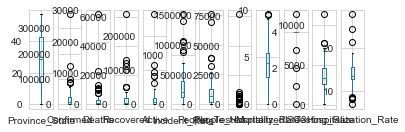

In [64]:
df.plot(kind='box',subplots=True, layout=(2,12))

The plot box situated above are representing the minimum value , maximum value and showing the mean value for the variables. In some of the variables such as Hospitalization rate , confirmed, death , recovered etc..
The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

Text(0.5, 1.0, 'Deaths in each Province_State')

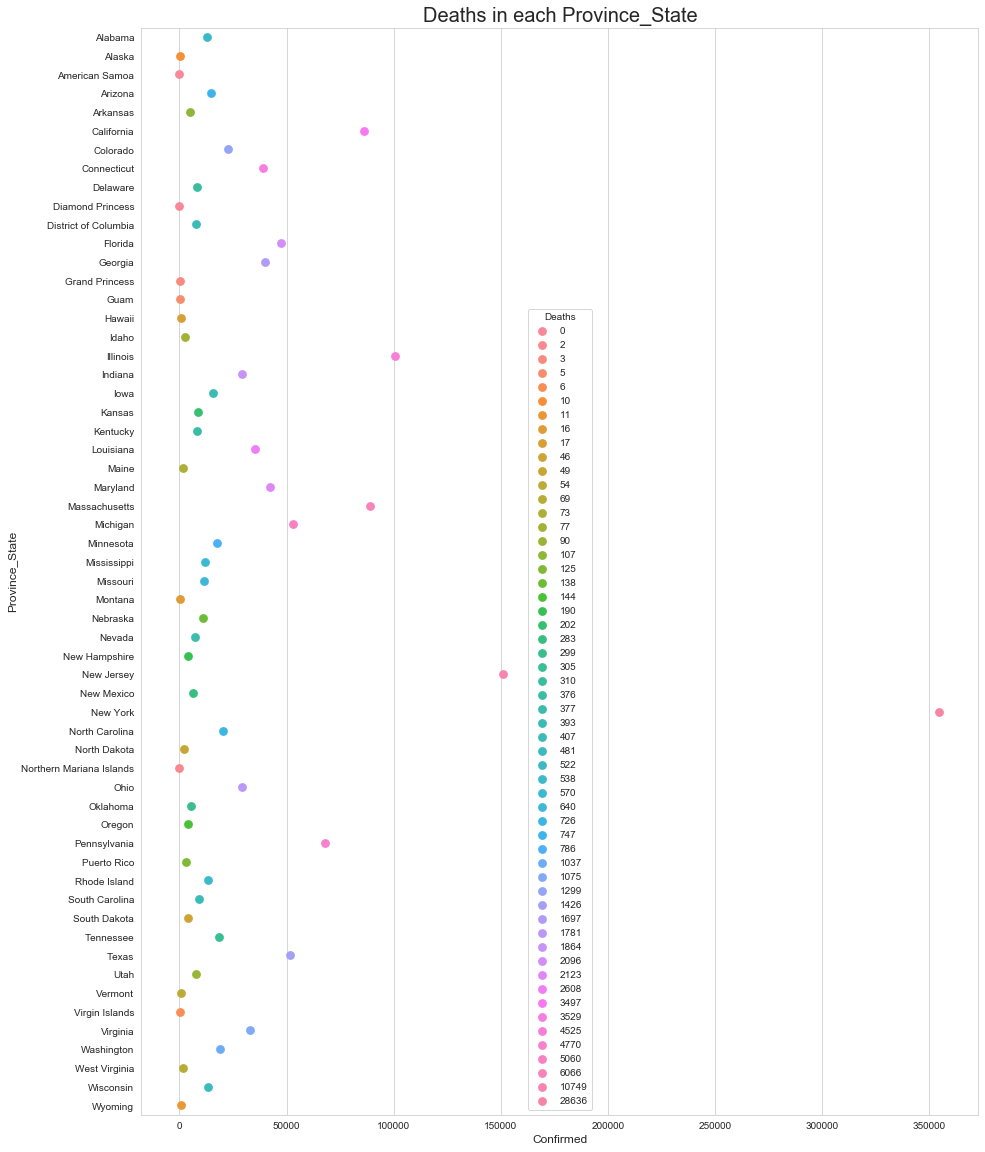

In [34]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='Confirmed', y='Province_State', data=df, hue='Deaths',join=False)
plt.xlabel('Confirmed',{'fontsize' : 'large'})
plt.ylabel('Province_State',{'fontsize':'large'})
plt.title("Deaths in each Province_State",{'fontsize':20})

In the above graph we have the confirmed cases with respect to the state also it encounters the death, such as we can see that most of the states confirmed cases are below 50k and deaths is also minimal when compared.

There are few states which are adversely affected such as :

    1. New York
    2. New Jersey
    3. Illinois
    4. Massachusetts
    5. Pennsyllvania

These states have the highest number of confirmed cases and Highest deaths have occured in these states only.

Text(0.5, 1.0, 'Active Patient in each Province_State')

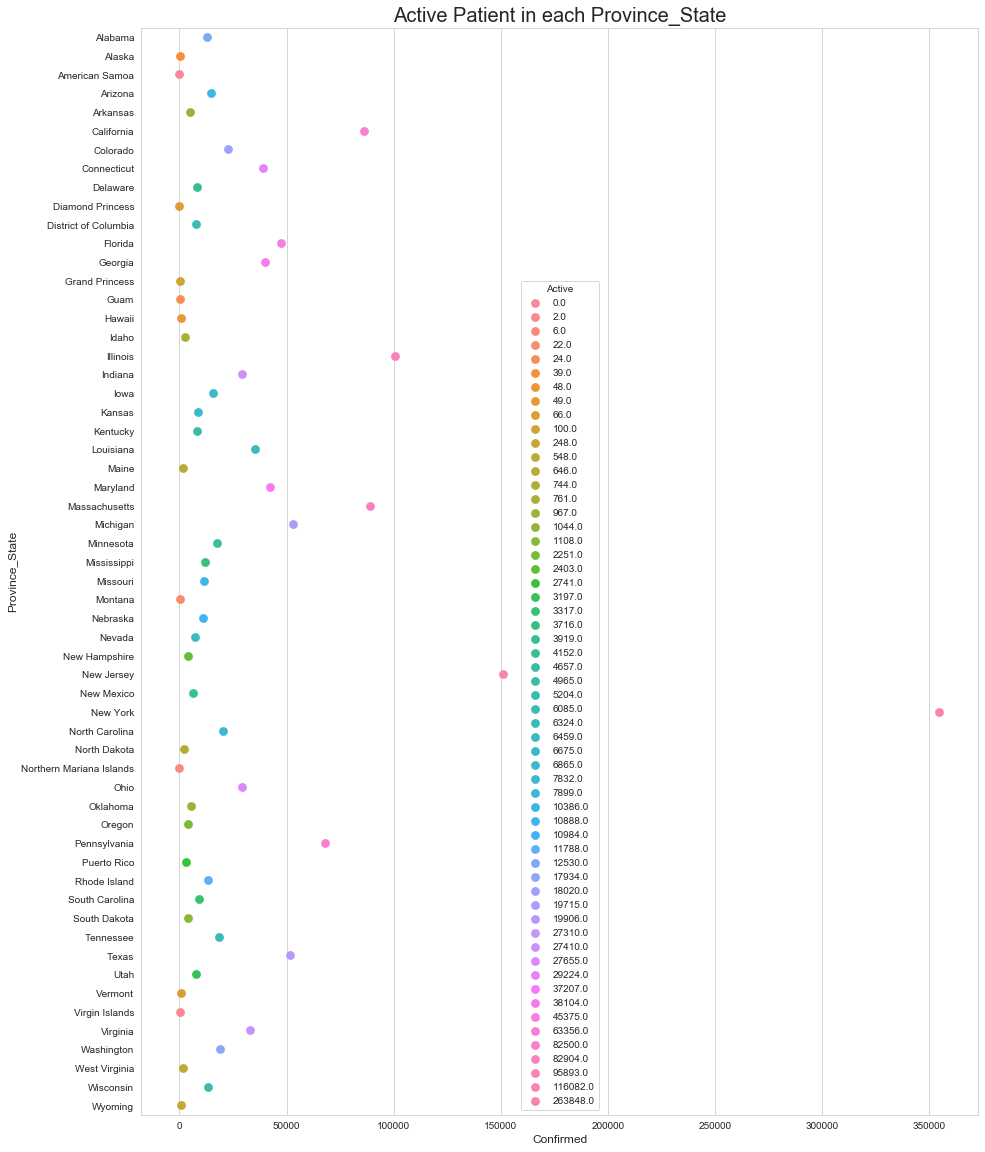

In [35]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='Confirmed', y='Province_State', data=df, hue='Active',join=False)
plt.xlabel('Confirmed',{'fontsize' : 'large'})
plt.ylabel('Province_State',{'fontsize':'large'})
plt.title("Active Patient in each Province_State",{'fontsize':20})

In the above graph we have the confirmed cases with respect to the state also it encounters the Active patients in the different states, such as we can see that most of the states confirmed cases are below 50k and number of active patients are not as much as the below 5 states. 

There are few states which are adversely affected such as :
1. New York
2. New Jersey
3. Illinois
4. Massachusetts
5. Pennsyllvania

These states have the highest number of confirmed cases and Highest Active patients are in New York which is above 2.60 lac cases.

Text(0.5, 1.0, 'Recovered Patient in each Province_State')

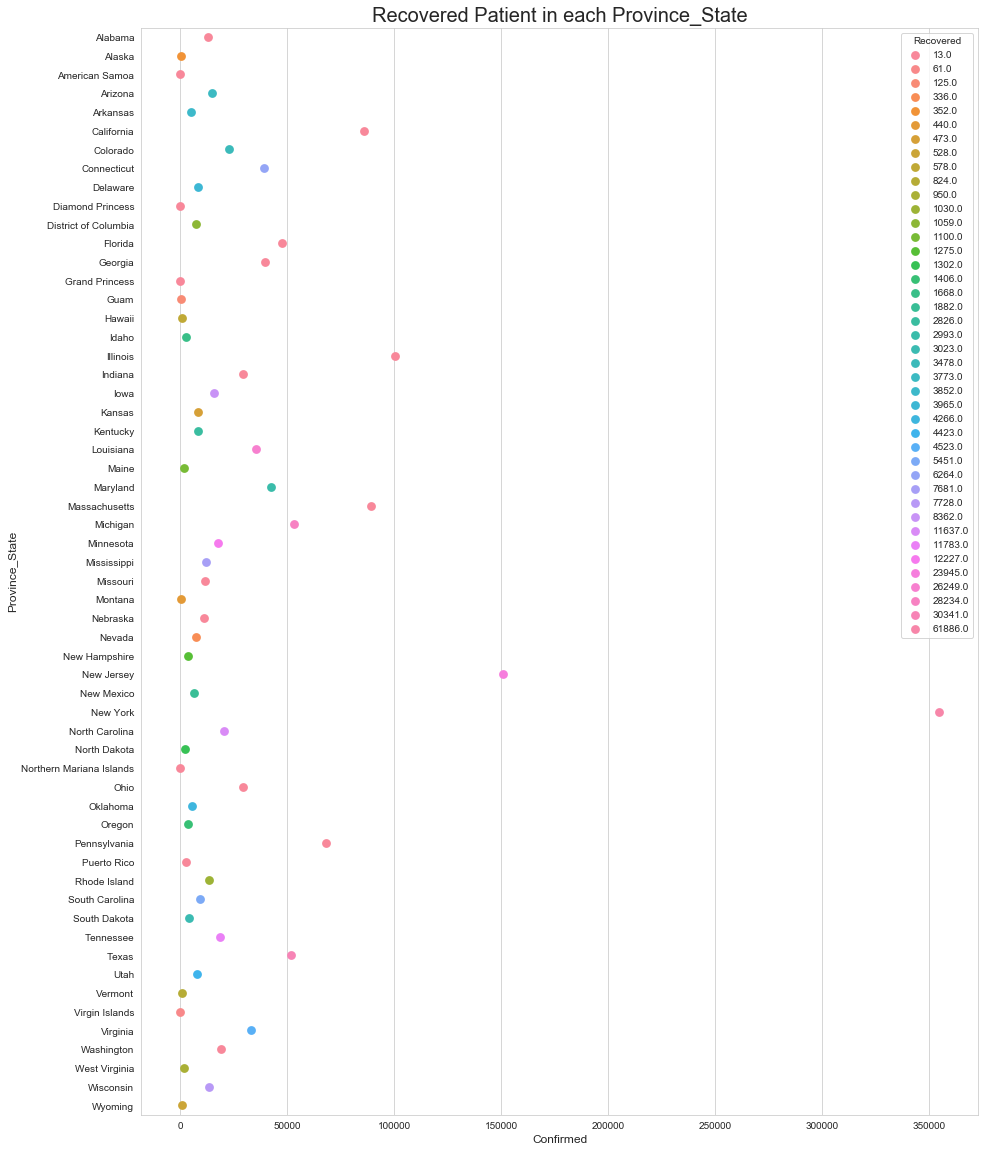

In [36]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='Confirmed', y='Province_State', data=df, hue='Recovered',join=False)
plt.xlabel('Confirmed',{'fontsize' : 'large'})
plt.ylabel('Province_State',{'fontsize':'large'})
plt.title("Recovered Patient in each Province_State",{'fontsize':20})

In the above graph we have the confirmed cases with respect to the state also it encounters the Recovered cases, such as we can see that most of the states confirmed cases are below 50k but still there are some people who have been treated and they were recovered.

There are few states :
1. New York
2. New Jersey
3. Tennessee
4. North Carolina
5. Minnesota
6. Louisiana

These states have the highest number of Recovered cases where the people have been diagnosed with corona virus and they have been cured .

Text(0.5, 1.0, 'Hospitalization Rate in each Province_State')

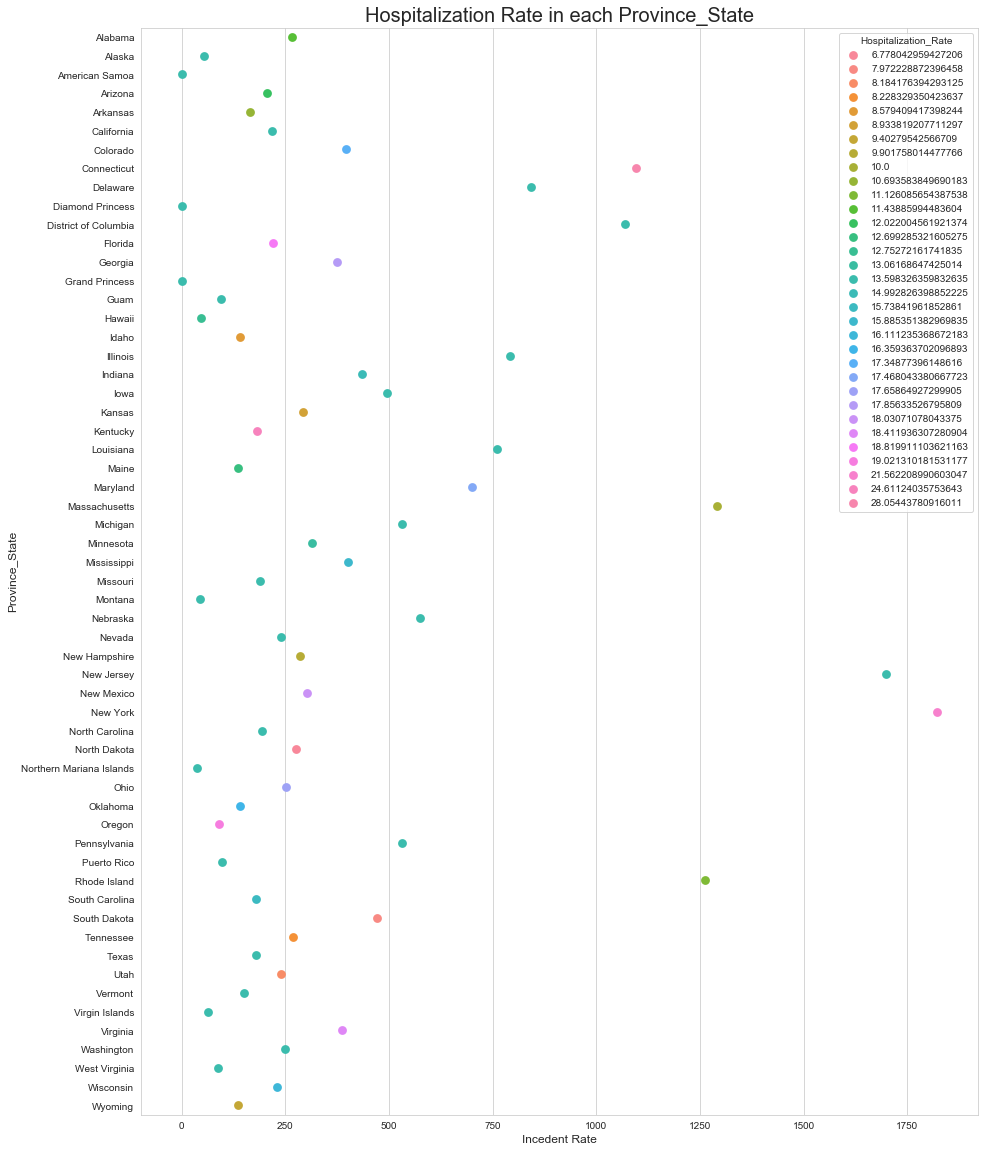

In [37]:
plt.figure(figsize=(15,20))
sns.set_style('whitegrid')
sns.pointplot(x='Incident_Rate', y='Province_State', data=df, hue='Hospitalization_Rate',join=False)
plt.xlabel('Incedent Rate',{'fontsize' : 'large'})
plt.ylabel('Province_State',{'fontsize':'large'})
plt.title("Hospitalization Rate in each Province_State",{'fontsize':20})

Hospitalization_rate is the total number of people which have been hospitalized to the Number of confirmed cases.

In the above graph we an see that the Highest Hospitalization rate is of New york city i.e. 28.05 it is denoted with the pink dotwhere it also has the highest rate of incedent above 1750 cases.

There are other states where the hospitalization rate is more they are:

1. Oregon
2. Virginia
3. Kentucky
4. Florida

# LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,0,13052,522,13.0,12530.0,266.194321,164450.0,1493.0,3.999387,4,3353.942386,11.438860
1,1,401,10,352.0,39.0,54.815493,37045.0,1493.0,2.493766,4,5063.940017,13.598326
2,2,0,0,13.0,0.0,0.000000,124.0,1493.0,0.000000,0,222.857246,13.598326
3,3,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,4,2272.859351,12.022005
4,4,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,4,3189.670370,10.693584


# Removing Outliers:

In [39]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(58, 12)


In [40]:
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(51, 12)


After removing the outliers from the data the shape of the data has change from 58,12 to 51,12 which shows that with the z score we are able to remove 5 rows , Hence our new data shape is (51,12)

Changing the columns:

Bringing the Deaths column to the first in order to ease our processing.

In [41]:
mid = df1['Deaths']
df1.drop(labels=['Deaths'], axis=1, inplace = True)
df1.insert(0, 'Deaths', mid)
df1.head()

,Deaths,Province_State,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,522,0,13052,13.0,12530.0,266.194321,164450.0,1493.0,3.999387,4,3353.942386,11.438860
1,10,1,401,352.0,39.0,54.815493,37045.0,1493.0,2.493766,4,5063.940017,13.598326
3,747,3,14906,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,4,2272.859351,12.022005
4,107,4,5003,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,4,3189.670370,10.693584
6,1299,6,22797,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,4,2289.339188,17.348774


In [42]:
#Province  state is not necessary for predicting the confirmed cases:
df1.drop("Province_State", axis=1,inplace=True)

# Assigning X AND Y Variables:


I wanted to build a strong model in order to predict the Deaths cases for the further dates, as we have seen in the real time data the cases have been rising in every city day by day and also changes with the city.

In [43]:
df1.head(1)

,Deaths,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,522,13052,13.0,12530.0,266.194321,164450.0,1493.0,3.999387,4,3353.942386,11.43886


In [44]:
x=df1.iloc[:,1:11]
x.shape
x.head()

,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,13.0,12530.0,266.194321,164450.0,1493.0,3.999387,4,3353.942386,11.438860
1,401,352.0,39.0,54.815493,37045.0,1493.0,2.493766,4,5063.940017,13.598326
3,14906,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,4,2272.859351,12.022005
4,5003,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,4,3189.670370,10.693584
6,22797,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,4,2289.339188,17.348774


In [45]:
y=df1.iloc[:,0:1]
y.shape
y.head()

,Deaths
0,522
1,10
3,747
4,107
6,1299


In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_scaler = scaler.transform(x)
x = pd.DataFrame(df1_scaler)
x.columns = ['Confirmed', 'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
        'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate',
        'Hospitalization_Rate','ISO3']
x.head(10)

,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate,ISO3
0,-0.213011,-0.571805,-0.020820,-0.178018,-0.056600,-0.259084,-0.140437,0.115087,-0.120084,-0.682277
1,-0.779681,-0.522518,-0.634689,-0.968631,-0.753854,-0.259084,-0.881309,0.115087,0.924446,-0.027419
2,-0.129966,-0.025146,-0.126187,-0.407691,-0.051209,-0.117904,0.357548,0.115087,-0.780450,-0.505438
3,-0.573546,-0.013661,-0.585298,-0.553584,-0.429797,-0.711425,-1.056018,0.115087,-0.220428,-0.908282
4,0.223492,-0.068036,0.248985,0.306996,-0.235082,0.903404,0.695459,0.115087,-0.770383,1.109903
5,-0.430613,0.002768,-0.444007,1.973690,-0.708063,-0.259084,-0.246788,0.115087,0.679875,-0.027419
6,-0.795448,-0.571805,-0.634198,-1.173655,-0.955913,-0.259084,-2.108418,0.115087,-2.109117,-0.027419
7,-0.459415,-0.419729,-0.337559,2.828154,-0.735389,-0.259084,0.543851,0.115087,1.329533,-0.027419
8,1.328702,-0.571805,1.593344,-0.346966,3.264794,3.254349,0.064235,0.115087,0.024954,1.556025
9,0.985144,-0.571805,1.236012,0.228439,1.248594,2.391691,-0.010370,0.115087,0.149381,1.263820


# MODEL SELECTION
Using different types of model in oder to acquire optimum solution:

In [47]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)
    return final_r_state

# Linear Regression

In [48]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42 is:  0.9999934779198084
r2_score corresponding to random state:  43 is:  0.9999904820154458
r2_score corresponding to random state:  44 is:  0.9999911267295054
r2_score corresponding to random state:  45 is:  0.9999535067757358
r2_score corresponding to random state:  46 is:  0.9999885244924608
r2_score corresponding to random state:  47 is:  0.9999974276463188
r2_score corresponding to random state:  48 is:  0.9999756920562057
r2_score corresponding to random state:  49 is:  0.9999524970534599
r2_score corresponding to random state:  50 is:  0.9999883841682989
r2_score corresponding to random state:  51 is:  0.9999338171364143
r2_score corresponding to random state:  52 is:  0.9999610516024655
r2_score corresponding to random state:  53 is:  0.9999903772074649
r2_score corresponding to random state:  54 is:  0.9999364816845872
r2_score corresponding to random state:  55 is:  0.9999962679574823
r2_score corresponding to random state:  56 is: 

# KNeighborsRegressor

In [49]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knn= KNeighborsRegressor()
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 6}

In [52]:
knn= KNeighborsRegressor(n_neighbors=6)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.8540959206174528
r2_score corresponding to random state:  43 is:  0.5802965200150956
r2_score corresponding to random state:  44 is:  0.623614003956857
r2_score corresponding to random state:  45 is:  0.7149413821573626
r2_score corresponding to random state:  46 is:  0.6301437603187644
r2_score corresponding to random state:  47 is:  0.5118121056078041
r2_score corresponding to random state:  48 is:  0.8403344163466069
r2_score corresponding to random state:  49 is:  0.748467519335652
r2_score corresponding to random state:  50 is:  0.8221455608617356
r2_score corresponding to random state:  51 is:  0.7700843101555065
r2_score corresponding to random state:  52 is:  0.7502331255793476
r2_score corresponding to random state:  53 is:  0.5141715912355143
r2_score corresponding to random state:  54 is:  0.8627957905327783
r2_score corresponding to random state:  55 is:  0.540028919071547
r2_score corresponding to random state:  56 is:  0.

# Logistic Regression

In [54]:
lor= LogisticRegression()
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.8540959206174528
r2_score corresponding to random state:  43 is:  0.5802965200150956
r2_score corresponding to random state:  44 is:  0.623614003956857
r2_score corresponding to random state:  45 is:  0.7149413821573626
r2_score corresponding to random state:  46 is:  0.6301437603187644
r2_score corresponding to random state:  47 is:  0.5118121056078041
r2_score corresponding to random state:  48 is:  0.8403344163466069
r2_score corresponding to random state:  49 is:  0.748467519335652
r2_score corresponding to random state:  50 is:  0.8221455608617356
r2_score corresponding to random state:  51 is:  0.7700843101555065
r2_score corresponding to random state:  52 is:  0.7502331255793476
r2_score corresponding to random state:  53 is:  0.5141715912355143
r2_score corresponding to random state:  54 is:  0.8627957905327783
r2_score corresponding to random state:  55 is:  0.540028919071547
r2_score corresponding to random state:  56 is:  0.

# DecisionTreeClassifier

In [55]:
from scipy.stats import entropy
dtc= DecisionTreeClassifier(random_state=10,criterion=entropy,max_depth=5,min_samples_split=2)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.8540959206174528
r2_score corresponding to random state:  43 is:  0.5802965200150956
r2_score corresponding to random state:  44 is:  0.623614003956857
r2_score corresponding to random state:  45 is:  0.7149413821573626
r2_score corresponding to random state:  46 is:  0.6301437603187644
r2_score corresponding to random state:  47 is:  0.5118121056078041
r2_score corresponding to random state:  48 is:  0.8403344163466069
r2_score corresponding to random state:  49 is:  0.748467519335652
r2_score corresponding to random state:  50 is:  0.8221455608617356
r2_score corresponding to random state:  51 is:  0.7700843101555065
r2_score corresponding to random state:  52 is:  0.7502331255793476
r2_score corresponding to random state:  53 is:  0.5141715912355143
r2_score corresponding to random state:  54 is:  0.8627957905327783
r2_score corresponding to random state:  55 is:  0.540028919071547
r2_score corresponding to random state:  56 is:  0.

# Lasso:

In [56]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.001}

In [57]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.001)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.8183933626411766
r2_score corresponding to random state:  43 is:  0.8505292025900361
r2_score corresponding to random state:  44 is:  0.9345907882932777
r2_score corresponding to random state:  45 is:  0.9301574600296041
r2_score corresponding to random state:  46 is:  0.902484407340899
r2_score corresponding to random state:  47 is:  0.7806255745241808
r2_score corresponding to random state:  48 is:  0.8096884693628978
r2_score corresponding to random state:  49 is:  0.8817957901904171
r2_score corresponding to random state:  50 is:  0.7116933565084769
r2_score corresponding to random state:  51 is:  0.383940834584948
r2_score corresponding to random state:  52 is:  0.8127491036201515
r2_score corresponding to random state:  53 is:  0.8944509960017244
r2_score corresponding to random state:  54 is:  0.906958076315992
r2_score corresponding to random state:  55 is:  0.9088619934667042
r2_score corresponding to random state:  56 is:  0.

# Cross_val_score

In [58]:
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.9999566813122922
Standard Deviation r2 score for Linear Regression:  5.18727934609798e-05


Mean r2 score for knn:  0.7044601947951359
Standard Deviation r2 score for knn:  0.1360214690264751


Mean r2 score for lasso  0.5651130625375727
Standard Deviation r2 score for lasso  0.3666785288468777


In [59]:
y_pred

array([4712.23084483,  755.66201211,  643.5019585 , 3328.76105266,
        246.09270865, 3581.05316906,  450.17918136,  602.03515749,
       4292.70291067,  128.65958614,  768.56196268])

# K-MEANS CLUSTERING
We are going to try here K-Means Clustering model as I can see the unsupervised machine learning. Here kmeans will try to attempt to classify data without being trained first with labeled data.

In [60]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kModel=kmeans.fit(df1)

In [61]:
kModel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [62]:
pd.crosstab(df1.Deaths,kModel.labels_)

col_0,0,1,2
Deaths,,,
0,1,0,0
2,1,0,0
3,1,0,0
6,1,0,0
10,1,0,0
11,1,0,0
16,1,0,0
17,1,0,0
46,1,0,0


In [63]:
from sklearn.metrics import homogeneity_score
print(homogeneity_score(kModel.labels_,df1.Deaths))

1.0


# Choosing a Model:

Under the given dataset of US covid-19 dataset, I have tested few models above and it was little difficult to understand and finalize the final model. 

Almost all the models are providing more than 90% of the accuracy score where K-means model scoring is equivalent to 100% and linear model is around 99.99% of accuracy score. But it is the ideal situaltion to get 100% in very hard, thus I am going to predidct my y variables i.e.. deaths in all the states through Linear Regression Model. Thus, I am going to choose the final model as LINEAR REGRESSION MODEL.

# Saving the File:

In [66]:
from sklearn.externals import joblib

In [67]:
joblib.dump(lreg,'Project_9_Covid_19_analysis.obj')

['Project_9_Covid_19_analysis.obj']

In [68]:
model=joblib.load('Project_9_Covid_19_analysis.obj')

In [69]:
#Pridicting x_test
lreg.predict(x_test)

array([[ 6.08641012e+03],
       [-9.48814588e+00],
       [ 5.68247832e+02],
       [ 5.07810517e+03],
       [ 1.16228957e+02],
       [ 4.79341170e+03],
       [ 4.08553424e+02],
       [ 3.36676617e+00],
       [ 4.54682760e+03],
       [ 7.56818146e+01],
       [ 7.27666801e+02]])